In [1]:
#for loading data and for performing data analysis operations on it
import pandas as pd
import numpy as np

#for data visualization
import seaborn as sns 
import matplotlib.pyplot as plt

#for PCA (feature engineering)
from sklearn.decomposition import PCA

#for data scaling
from sklearn.preprocessing import StandardScaler

#for splitting dataset
from sklearn.model_selection import train_test_split

#for fitting SVM model
from sklearn.svm import SVC

#foe fitting Kmeans model
from sklearn.cluster import KMeans

#for displaying evaluation metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#for file operations
import os

print("All required libraries loaded!")

All required libraries loaded!


In [2]:
#import the raw data
raw_data = pd.read_csv("data.csv")
print(raw_data.shape)
print(f"There are {raw_data.shape[0]} rows in dataset")
raw_data.head()

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(134380371, 8)
There are 134380371 rows in dataset


,day,interval,detid,flow,occ,error,city,speed
0,2017-05-06,0,06.X-2li,12.0,0.0,1.0,augsburg,NaN
1,2017-05-06,300,06.X-2li,12.0,0.0,1.0,augsburg,NaN
2,2017-05-06,600,06.X-2li,12.0,0.0,1.0,augsburg,NaN
3,2017-05-06,900,06.X-2li,16.0,0.0,1.0,augsburg,NaN
4,2017-05-06,1200,06.X-2li,16.0,0.0,1.0,augsburg,NaN


In [3]:
#check the data types of all the attributes loaded into the dataframe
raw_data.dtypes

day          object
interval      int64
detid        object
flow        float64
occ         float64
error       float64
city         object
speed       float64
dtype: object

In [4]:
#see first few rows of the data loaded
raw_data.head()

,day,interval,detid,flow,occ,error,city,speed
0,2017-05-06,0,06.X-2li,12.0,0.0,1.0,augsburg,NaN
1,2017-05-06,300,06.X-2li,12.0,0.0,1.0,augsburg,NaN
2,2017-05-06,600,06.X-2li,12.0,0.0,1.0,augsburg,NaN
3,2017-05-06,900,06.X-2li,16.0,0.0,1.0,augsburg,NaN
4,2017-05-06,1200,06.X-2li,16.0,0.0,1.0,augsburg,NaN


In [5]:
#see last few rows of the data loaded
raw_data.tail()

,day,interval,detid,flow,occ,error,city,speed
134380366,2015-11-01,85500,K8D20,120.0,0.015556,0.0,zurich,NaN
134380367,2015-11-01,85680,K8D20,120.0,0.017778,0.0,zurich,NaN
134380368,2015-11-01,85860,K8D20,120.0,0.014444,0.0,zurich,NaN
134380369,2015-11-01,86040,K8D20,200.0,0.028333,0.0,zurich,NaN
134380370,2015-11-01,86220,K8D20,180.0,0.024444,0.0,zurich,NaN


In [6]:
#Check for any missing value
raw_data.isnull().sum()
raw_data.isna().sum()

day                 0
interval            0
detid               0
flow                0
occ           3279527
error        59193481
city                0
speed       129750416
dtype: int64

In [7]:
raw_data=raw_data.dropna()

In [8]:
#Check for any missing value
raw_data.isnull().sum()
raw_data.isna().sum()
raw_data.head()

,day,interval,detid,flow,occ,error,city,speed
5237304,2017-11-13,30900,N51141G,1116.0,39.857143,1.0,bolton,28.0
5237305,2017-11-13,30900,N51151A,312.0,8.210526,1.0,bolton,38.0
5237306,2017-11-13,30900,N51151B,792.0,29.333333,1.0,bolton,27.0
5237307,2017-11-13,30900,N51151D,720.0,22.500000,1.0,bolton,32.0
5237308,2017-11-13,30900,N51161W,936.0,42.545455,1.0,bolton,22.0


In [9]:
#raw_data.loc[raw_data['city'] == bolton]
raw_data.city.unique()

array(['bolton', 'constance', 'essen', 'groningen', 'manchester',
       'rotterdam', 'torino'], dtype=object)

In [10]:
raw_data.speed.unique()

array([ 28.,  38.,  27., ..., 176., 165., 172.])

In [11]:
raw_data.flow.unique()

array([ 1116.,   312.,   792., ...,  4680.,  5052., 19800.])

In [12]:
#manchester_data = raw_data.loc[raw_data['city'] == 'manchester']
manchester_data = raw_data.loc[raw_data['city'] == 'bolton']

#manchester_data.head()
manchester_data.shape
#manchester_data.tail()

(185943, 8)

In [13]:
#manchester_data= manchester_data[manchester_data['speed'] != 0]
manchester_data = manchester_data.loc[manchester_data['speed'] != 0]

manchester_data.shape


(132421, 8)

In [14]:
manchester_data= manchester_data.loc[(manchester_data['speed'] >= 50) & (manchester_data['speed'] <= 75) & (manchester_data['flow'] >= 100)
                                    & (manchester_data['flow'] <= 1000)]
manchester_data.shape
#speed 60 - 75 and flow 100-1500(1000) gives us 32 data points
#speed 50 - 75 and flow 100-1500(1000) gives us 1743 data points and pretty graph


(1742, 8)

In [28]:
manchester_data.head()

,day,interval,detid,flow,occ,error,city,speed
5237367,2017-11-13,30900,N51311Z,480.0,9.056604,1.0,bolton,53.0
5237442,2017-11-13,30900,N53261W,960.0,18.823529,1.0,bolton,51.0
5237443,2017-11-13,30900,N53261Y,144.0,2.360656,1.0,bolton,61.0
5237533,2017-11-13,31200,N51311Z,480.0,9.056604,1.0,bolton,53.0
5237609,2017-11-13,31200,N53261Y,180.0,2.571429,1.0,bolton,70.0


In [15]:
#raw_data.info()
manchester_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1742 entries, 5237367 to 5484043
Data columns (total 8 columns):
day         1742 non-null object
interval    1742 non-null int64
detid       1742 non-null object
flow        1742 non-null float64
occ         1742 non-null float64
error       1742 non-null float64
city        1742 non-null object
speed       1742 non-null float64
dtypes: float64(4), int64(1), object(3)
memory usage: 122.5+ KB


In [16]:
#raw_data.describe()
manchester_data.describe()

,interval,flow,occ,error,speed
count,1742.000000,1742.000000,1742.000000,1742.0,1742.000000
mean,43266.647532,440.207807,8.288871,1.0,53.306664
std,24752.560334,111.917384,2.144968,0.0,2.075549
min,0.000000,102.000000,1.611940,1.0,50.019417
25%,23100.000000,480.000000,9.056604,1.0,53.000000
50%,42300.000000,480.000000,9.056604,1.0,53.000000
75%,64800.000000,480.000000,9.056604,1.0,53.000000
max,86100.000000,960.000000,18.823529,1.0,74.000000


In [17]:
#raw_data.dtypes
manchester_data.dtypes

day          object
interval      int64
detid        object
flow        float64
occ         float64
error       float64
city         object
speed       float64
dtype: object

In [18]:
#for col in raw_data.columns:
 #   print(col)
for col in manchester_data.columns:
    print(col)

day
interval
detid
flow
occ
error
city
speed


In [19]:
#X = raw_data.iloc[:,[3,7]].values
X = manchester_data.iloc[:,[3,7]].values
print (X)

[[480.  53.]
 [960.  51.]
 [144.  61.]
 ...
 [108.  67.]
 [480.  53.]
 [480.  53.]]


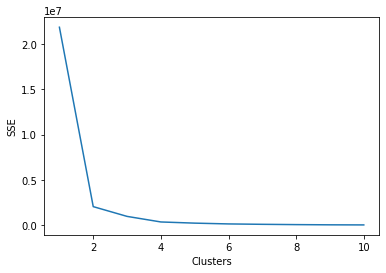

In [20]:
#elbow method
wcss = []
for i in range(1,11):
    k_means = KMeans(n_clusters=i,init='k-means++', random_state=42)
    k_means.fit(X)
    wcss.append(k_means.inertia_)
#plot elbow curve
plt.plot(np.arange(1,11),wcss)
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.show()

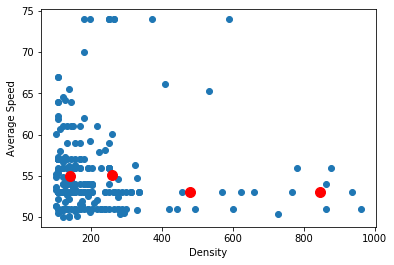

In [21]:
k_means_optimum = KMeans(n_clusters = 4, init = 'k-means++',  random_state=42)#42
k_means_optimum.fit(X)
y = k_means_optimum.fit_predict(X)

# Plot the data
plt.scatter(X[:, 0], 
            X[:, 1])

# Plot the clusters 
plt.scatter(k_means_optimum.cluster_centers_[:, 0], 
            k_means_optimum.cluster_centers_[:, 1], 
            s=100,                             # Set centroid size
            c='red')                           # Set centroid color

plt.xlabel("Density")
plt.ylabel("Average Speed")
plt.show()

#print(y)

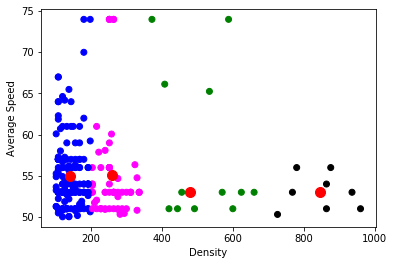

In [27]:
k_means_optimum = KMeans(n_clusters = 4, init = 'k-means++',  random_state=42)#42
k_means_optimum.fit(X)
y = k_means_optimum.fit_predict(X)

#colors = ['r','b','y','g']

#centroids = k_means_optimum.cluster_centers_
#labels = k_means_optimum.labels_

#print(centroids)
#print(labels)


colors = []
for i in k_means_optimum.labels_:
  if i == 0:
    colors.append('magenta')
  elif i == 1:
    colors.append('green')
  elif i == 2:
    colors.append('blue')
  elif i == 3:
    colors.append('black')

# Plot the data
plt.scatter(X[:, 0], 
            X[:, 1], 
           c=colors)

# Plot the clusters 
plt.scatter(k_means_optimum.cluster_centers_[:, 0], 
            k_means_optimum.cluster_centers_[:, 1], 
            s=100,                             # Set centroid size
            c='red')                           # Set centroid color

plt.xlabel("Density")
plt.ylabel("Average Speed")
plt.show()

#print(y)